In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import os 
import numpy as np
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
import math
from sklearn.model_selection import cross_val_score
import seaborn as sns
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
import warnings
warnings.filterwarnings("ignore")

In [28]:
file_path = 'happy.csv'  # Update this path to your file location
df = pd.read_csv(file_path)

df.head()

,Country name,Regional indicator,Ladder score,upperwhisker,lowerwhisker,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual
0,Finland,Western Europe,7.741,7.815,7.667,1.844,1.572,0.695,0.859,0.142,0.546,2.082
1,Denmark,Western Europe,7.583,7.665,7.500,1.908,1.520,0.699,0.823,0.204,0.548,1.881
2,Iceland,Western Europe,7.525,7.618,7.433,1.881,1.617,0.718,0.819,0.258,0.182,2.050
3,Sweden,Western Europe,7.344,7.422,7.267,1.878,1.501,0.724,0.838,0.221,0.524,1.658
4,Israel,Middle East and North Africa,7.341,7.405,7.277,1.803,1.513,0.740,0.641,0.153,0.193,2.298


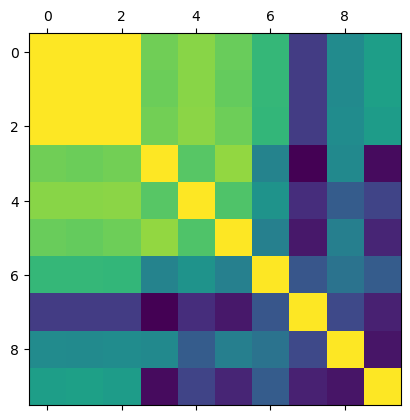

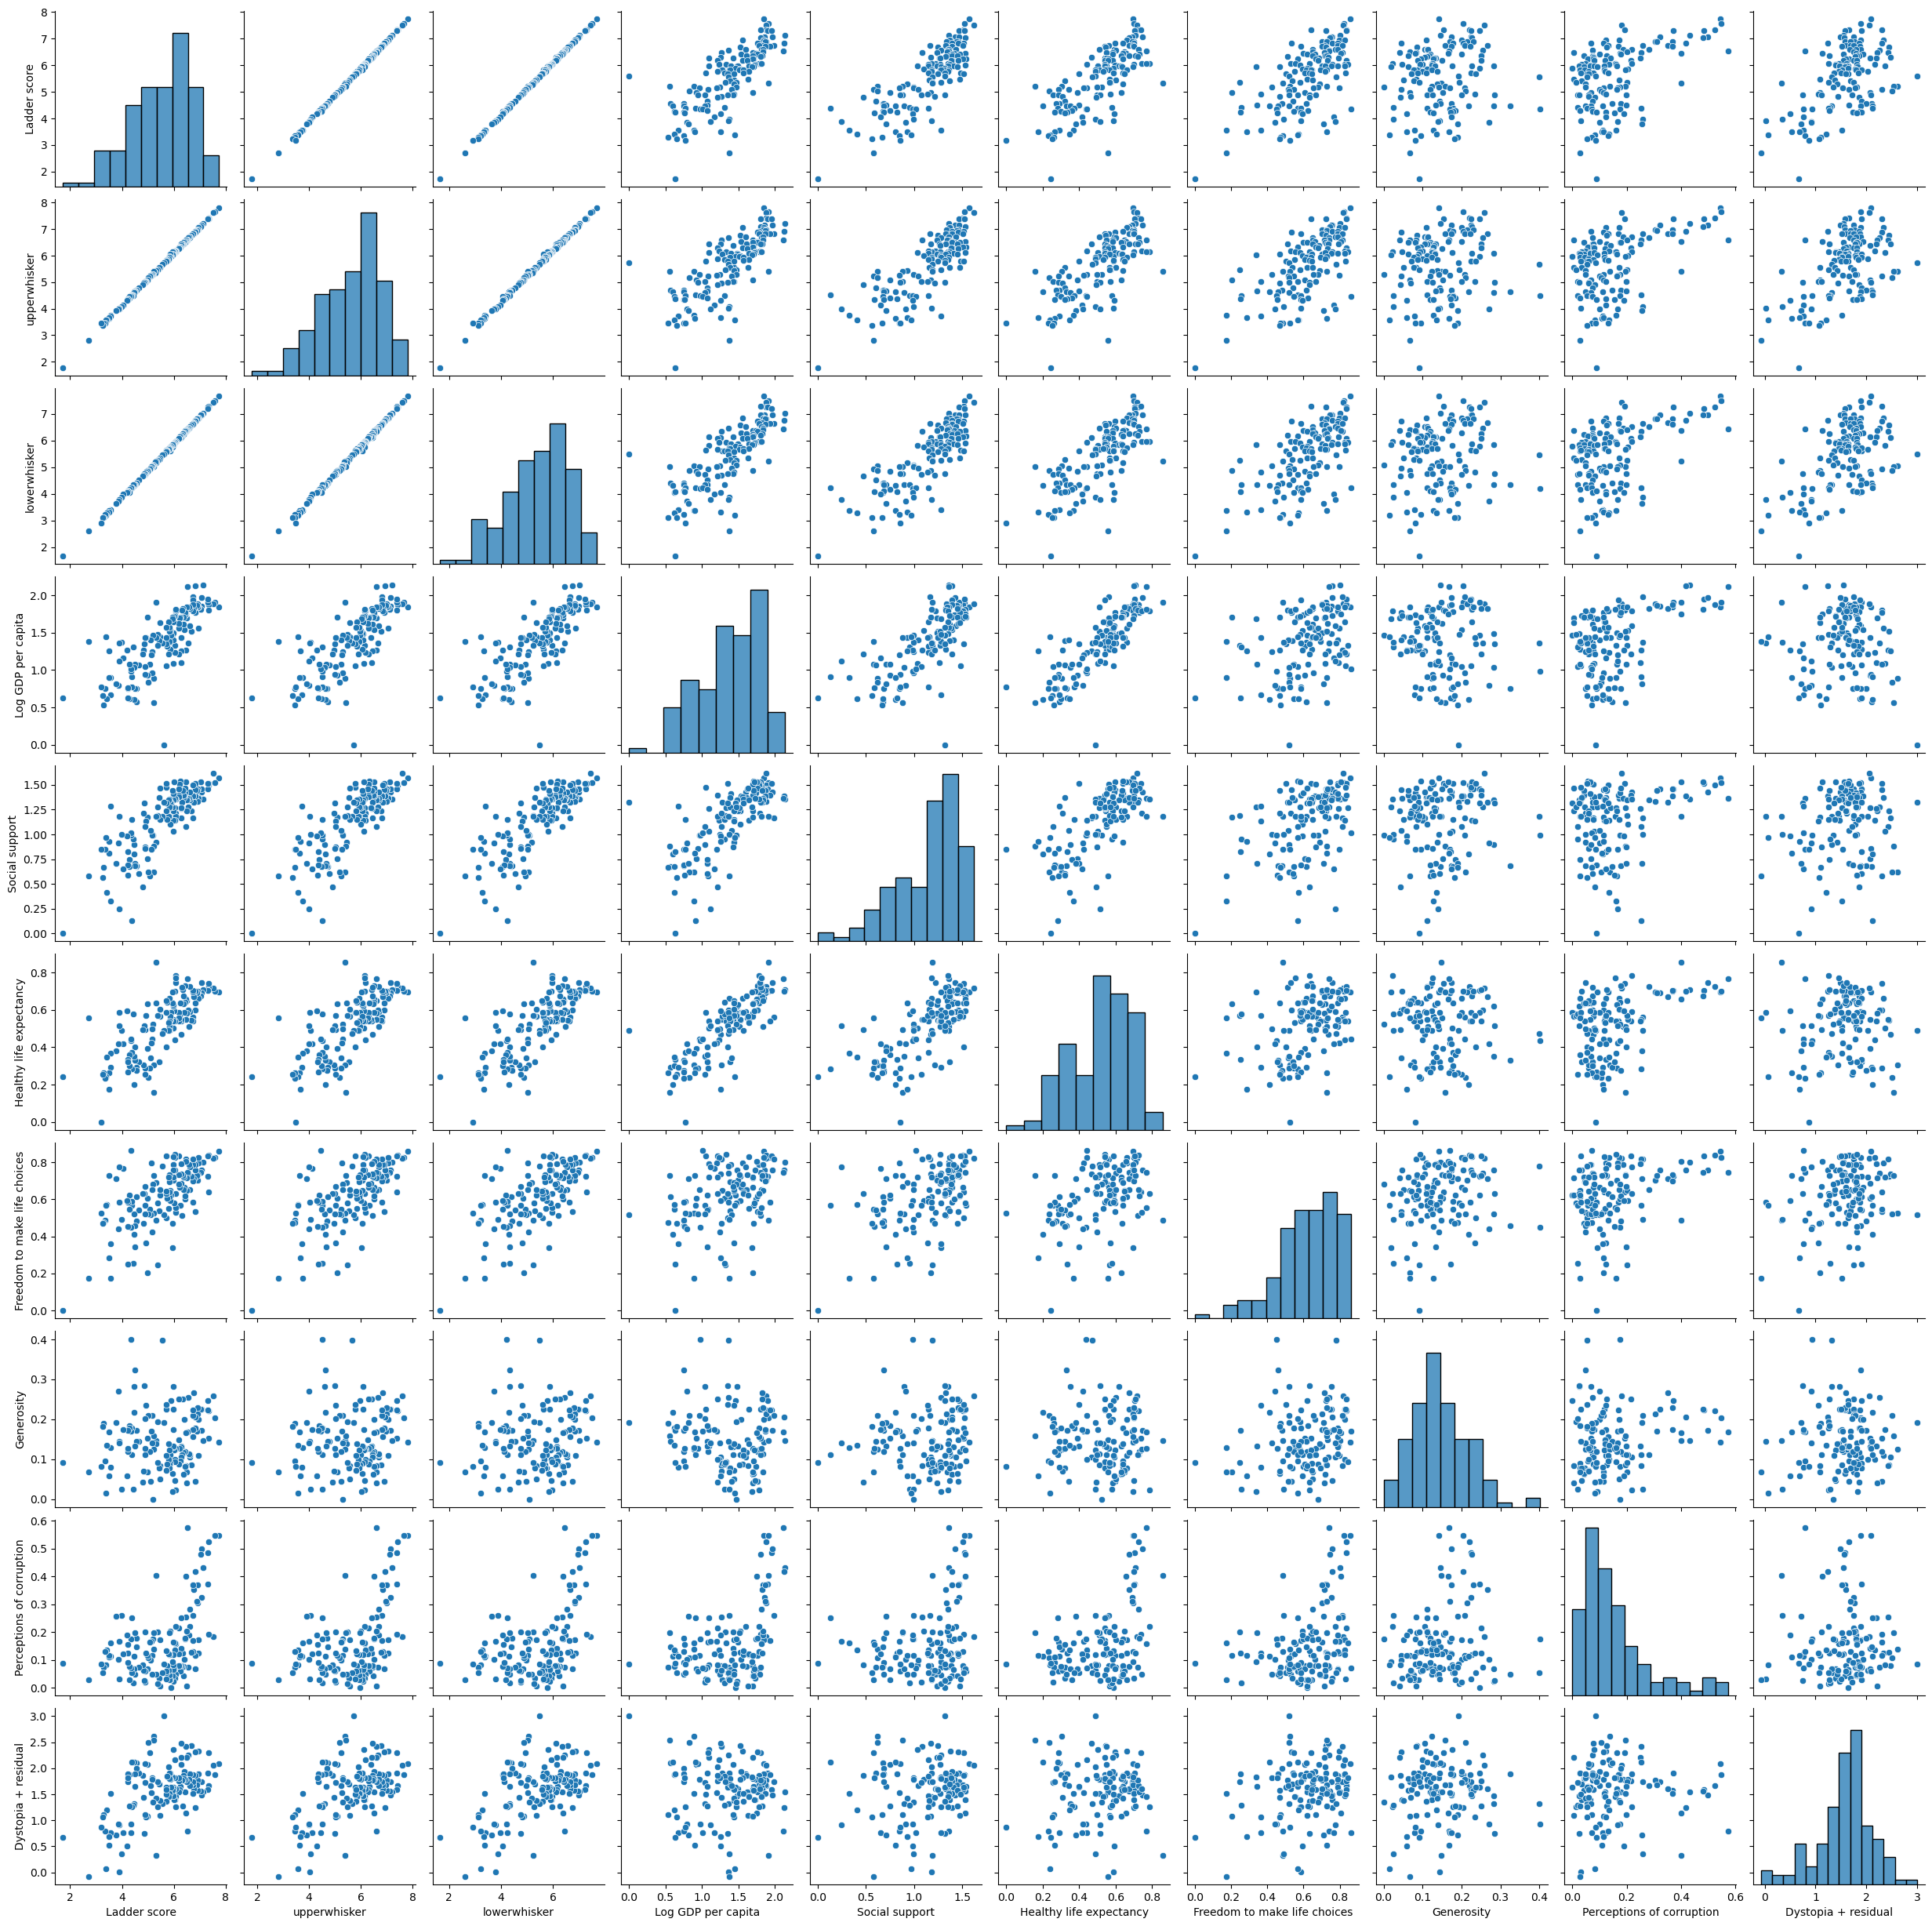

In [55]:
import matplotlib.pyplot as plt

plt.matshow(df.corr())
plt.show()

g = sns.pairplot(df)
plt.show()

In [77]:
# Calculate column averages
column_averages = df.mean()
 
# Display the results
print("Average for each column:")
print(column_averages)

Average for each column:
Ladder score                    5.527580
upperwhisker                    5.641175
lowerwhisker                    5.413972
Log GDP per capita              1.378807
Social support                  1.134329
Healthy life expectancy         0.520886
Freedom to make life choices    0.620621
Generosity                      0.146271
Perceptions of corruption       0.154121
Dystopia + residual             1.575914
dtype: float64


In [79]:
df.corr(method='pearson')

,Ladder score,upperwhisker,lowerwhisker,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual
Ladder score,1.000000,0.999678,0.999697,0.768504,0.813542,0.759659,0.644451,0.130038,0.451829,0.533542
upperwhisker,0.999678,1.000000,0.998750,0.761804,0.811550,0.751042,0.646309,0.129602,0.448847,0.542267
lowerwhisker,0.999697,0.998750,1.000000,0.774531,0.814992,0.767506,0.642291,0.130446,0.454480,0.524816
Log GDP per capita,0.768504,0.761804,0.774531,1.000000,0.726843,0.830256,0.414886,-0.059405,0.444227,-0.029118
Social support,0.813542,0.811550,0.814992,0.726843,1.000000,0.706924,0.484641,0.079466,0.250870,0.159484
Healthy life expectancy,0.759659,0.751042,0.767506,0.830256,0.706924,1.000000,0.401082,0.007148,0.399026,0.051538
Freedom to make life choices,0.644451,0.646309,0.642291,0.414886,0.484641,0.401082,1.000000,0.224323,0.344197,0.250792
Generosity,0.130038,0.129602,0.130446,-0.059405,0.079466,0.007148,0.224323,1.000000,0.172666,0.036423
Perceptions of corruption,0.451829,0.448847,0.454480,0.444227,0.250870,0.399026,0.344197,0.172666,1.000000,0.000964
Dystopia + residual,0.533542,0.542267,0.524816,-0.029118,0.159484,0.051538,0.250792,0.036423,0.000964,1.000000


In [81]:
print(df.corr())

                              Ladder score  upperwhisker  lowerwhisker  \
Ladder score                      1.000000      0.999678      0.999697   
upperwhisker                      0.999678      1.000000      0.998750   
lowerwhisker                      0.999697      0.998750      1.000000   
Log GDP per capita                0.768504      0.761804      0.774531   
Social support                    0.813542      0.811550      0.814992   
Healthy life expectancy           0.759659      0.751042      0.767506   
Freedom to make life choices      0.644451      0.646309      0.642291   
Generosity                        0.130038      0.129602      0.130446   
Perceptions of corruption         0.451829      0.448847      0.454480   
Dystopia + residual               0.533542      0.542267      0.524816   

                              Log GDP per capita  Social support  \
Ladder score                            0.768504        0.813542   
upperwhisker                            0.761804 

In [133]:
plt.show()

In [121]:
# Rename the columns to match the requested output format
grouped_df.columns = ['Generosity', 'Log GDP per capita']

# Display the result
print(grouped_df)

plt.figure(figsize=(12, 8))
for category in grouped_df['Generosity'].unique():
    subset = grouped_df[grouped_df['Generosity'] == generosity]
    plt.bar(subset['Generosity'], subset['Log GDP per capita'], label=category)


plt.ylabel('Log GDP per capita')
plt.title('Total Orders by Product and Category')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Generosity')
plt.tight_layout()
plt.show()


AttributeError: 'list' object has no attribute 'columns'